<a href="https://colab.research.google.com/github/k-suzuki2024/Kaggle-team/blob/team1/20240606_taitanic_suzuki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# pandasのread_csv関数でデータを読み込み、DataFrame型として変数に保持
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
# 先頭n件
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


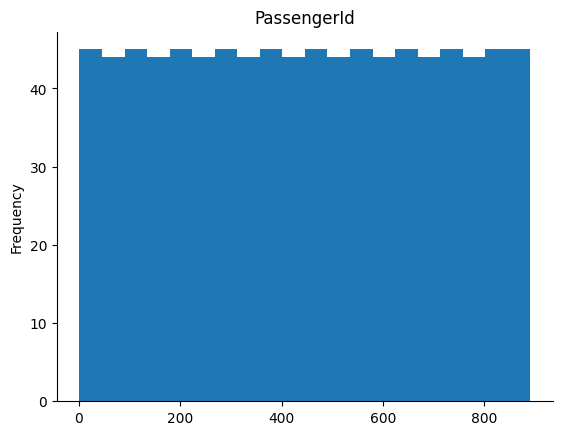

In [ ]:
# @title PassengerId

from matplotlib import pyplot as plt
train['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

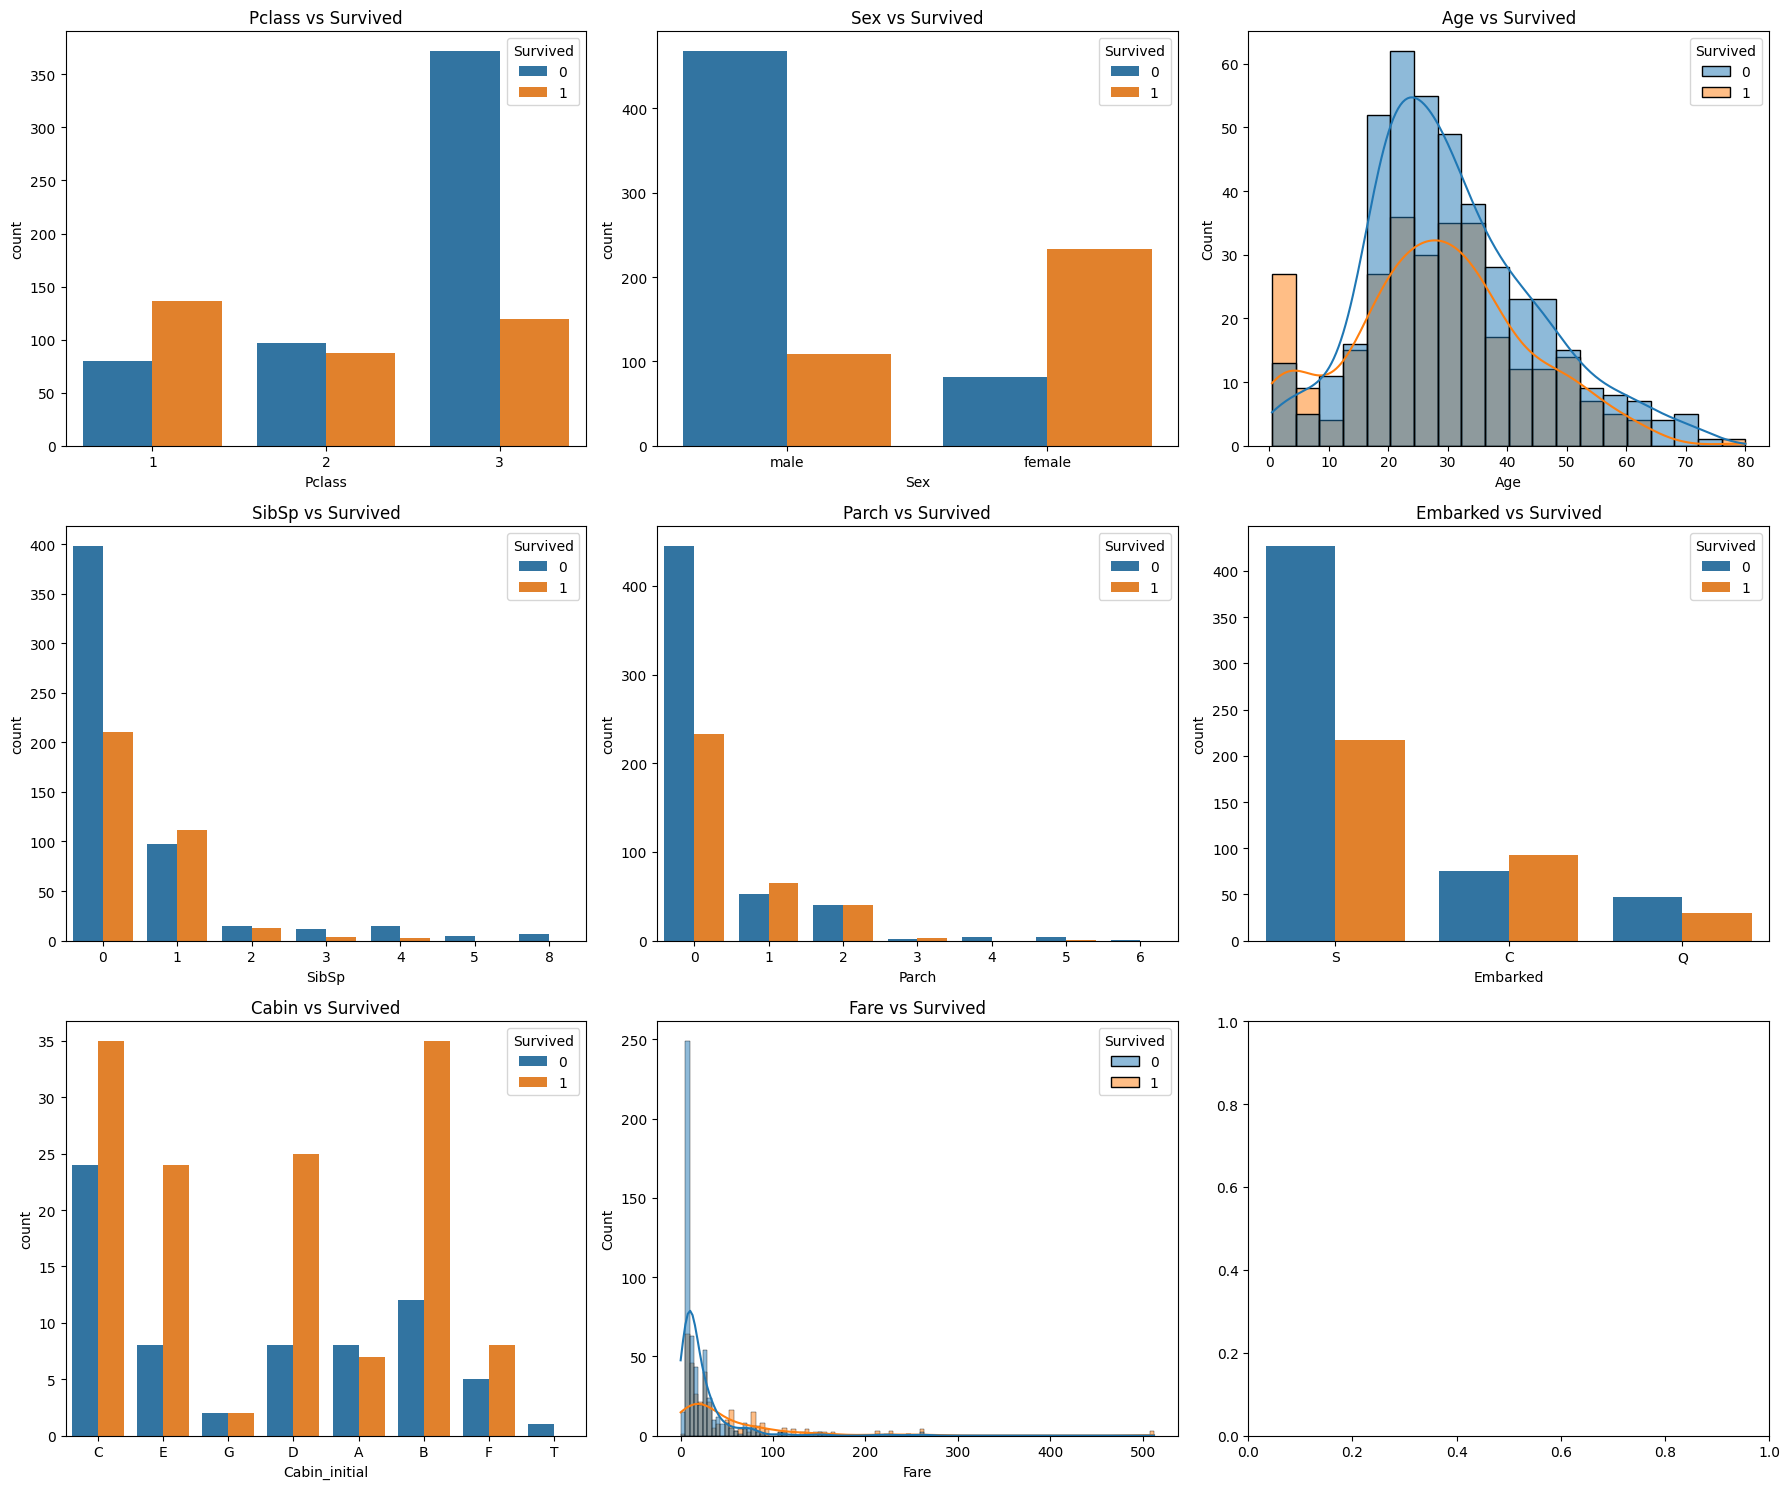

In [ ]:
# Survivedと各変数の分布
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Pclass
sns.countplot(data=train, x='Pclass', hue='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Pclass vs Survived')

# Sex
sns.countplot(data=train, x='Sex', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Sex vs Survived')

# Age
sns.histplot(data=train, x='Age', hue='Survived', kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Age vs Survived')

# SibSp
sns.countplot(data=train, x='SibSp', hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title('SibSp vs Survived')

# Parch
sns.countplot(data=train, x='Parch', hue='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Parch vs Survived')

# Embarked
sns.countplot(data=train, x='Embarked', hue='Survived', ax=axes[1, 2])
axes[1, 2].set_title('Embarked vs Survived')

# Cabin (表示のために最初の文字を抽出）
train['Cabin_initial'] = train['Cabin'].str[0]
sns.countplot(data=train, x='Cabin_initial', hue='Survived', ax=axes[2, 0])
axes[2, 0].set_title('Cabin vs Survived')

# Fare
sns.histplot(data=train, x='Fare', hue='Survived', kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Fare vs Survived')

plt.tight_layout()
plt.show()


#Pclass3は生存率が低い。男は生存率が低い。10歳未満は生存率が高い
#同乗者がいないと生存率が低い（同乗者が子供や女性だと一緒に避難できそう）、Sから乗ってると生存率が低い（Fareと相関がありそう）

In [ ]:
# 統計量表示
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# trainデータフレームのEmbarked列をダミー変数化
train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked_', prefix_sep='_', drop_first=False)

# testデータフレームのEmbarked列をダミー変数化
test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked_', prefix_sep='_', drop_first=False)

In [ ]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

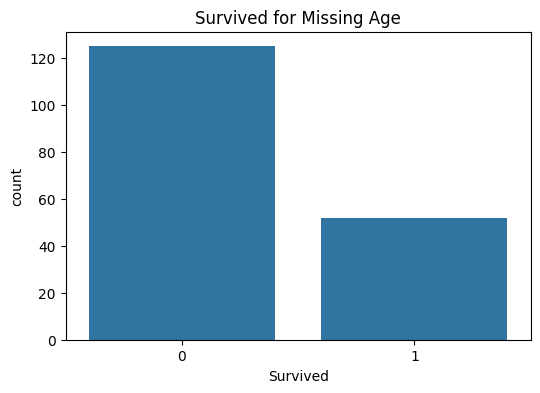

Survived
0    0.706215
1    0.293785
Name: proportion, dtype: float64


In [ ]:
#欠損値の補完　ageがNAの人は幼児？生存確率が高そう⇒×。社会的地位が低く出生記録が不正確な人？

# Ageが欠損しているデータ
age_missing = train[train['Age'].isna()]

# 可視化
plt.figure(figsize=(6, 4))
sns.countplot(data=age_missing, x='Survived')
plt.title('Survived for Missing Age')
plt.show()

# Ageが欠損しているデータのSurvived比率
age_missing = train[train['Age'].isna()]
age_missing_survived_ratio = age_missing['Survived'].value_counts(normalize=True)


print(age_missing_survived_ratio)

In [ ]:
# SurvivedとSexの組み合わせごとのAgeの中央値を計算⇒使えない
median_age_by_group = train.groupby(['Survived', 'Sex'])['Age'].median()
print(median_age_by_group)


Survived  Sex
0         0      29.0
          1      24.5
1         0      28.0
          1      28.0
Name: Age, dtype: float64


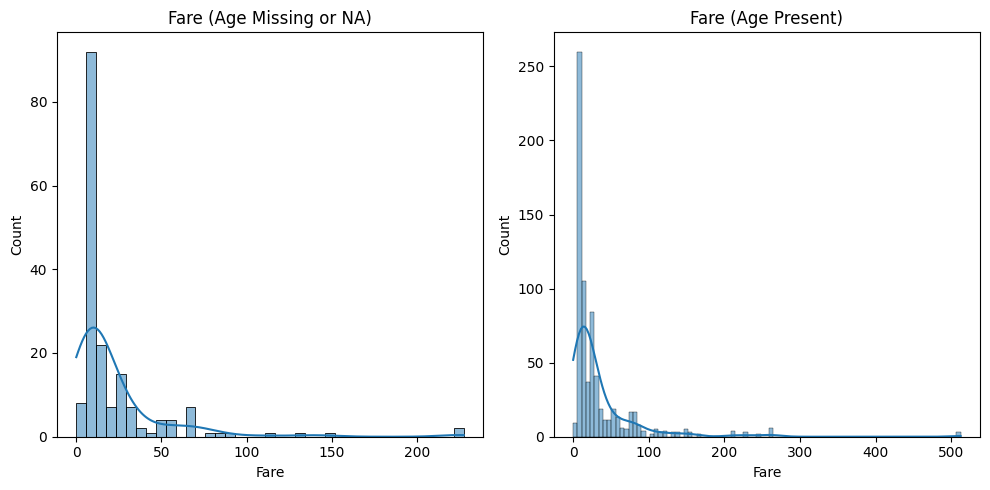

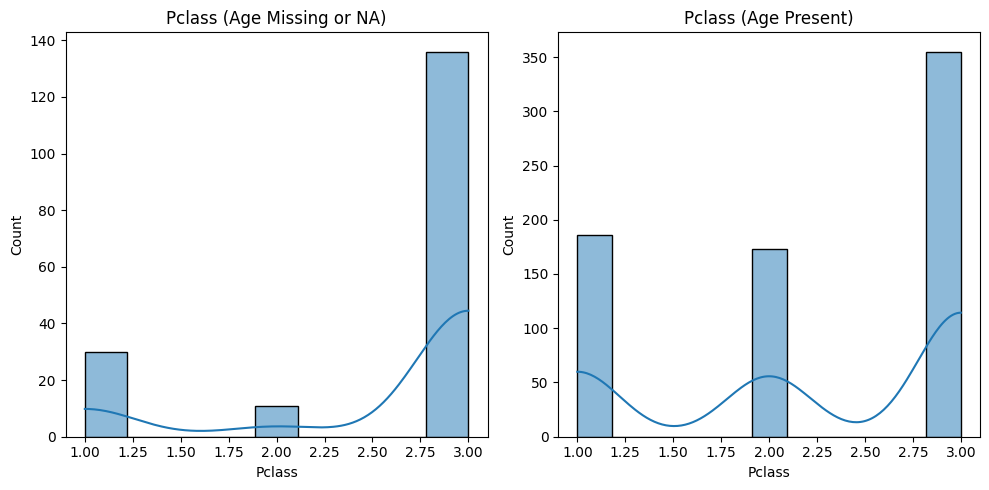

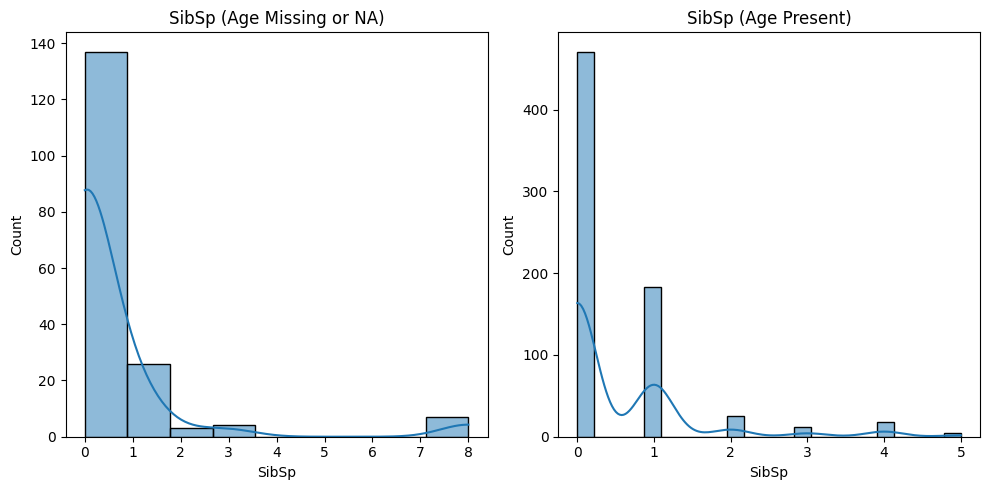

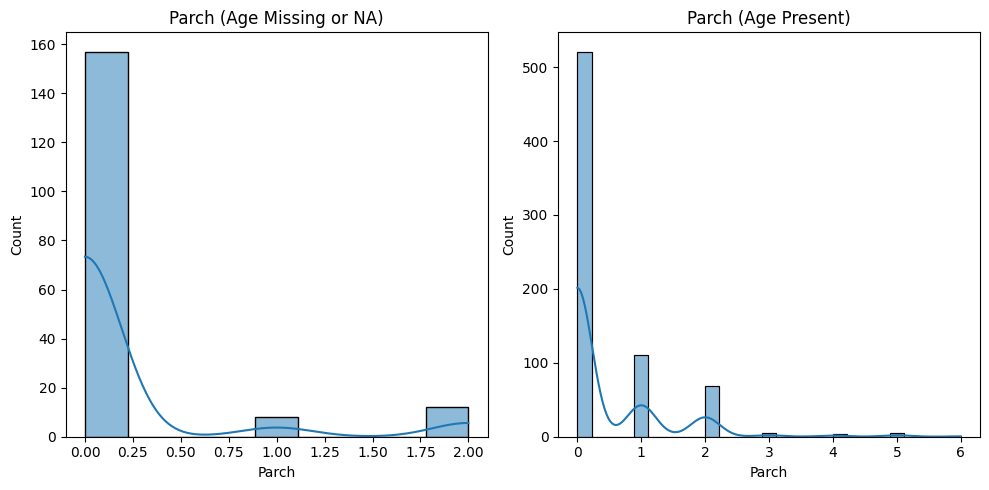

In [ ]:
# Ageが空欄またはNAの場合と数値が入っている場合に分割
age_missing_or_na = train[train['Age'].isnull() | train['Age'].isna()]
age_not_missing = train.dropna(subset=['Age'])

# 分布を比較するためのヒストグラムとKDEプロットを作成
variables = ['Fare', 'Pclass', 'SibSp', 'Parch']

for variable in variables:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=age_missing_or_na, x=variable, kde=True)
    plt.title(f'{variable} (Age Missing or NA)')

    plt.subplot(1, 2, 2)
    sns.histplot(data=age_not_missing, x=variable, kde=True)
    plt.title(f'{variable} (Age Present)')

    plt.tight_layout()
    plt.show()

In [ ]:
# trainデータフレームのAge列の欠損値を平均値で置き換える（AgeがNAの場合の特徴は不明）
train['Age'].fillna(train['Age'].mean(), inplace=True)

# testデータフレームのAge列の欠損値を平均値で置き換える
test['Age'].fillna(test['Age'].mean(), inplace=True)


In [ ]:
#特徴量の標準化（ageのみからFareも対象としたら改善した）

print(train['Age'][:10])
print(train['Fare'][:10])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#sc.fit_transform(train[['Age']])[:10] # 2次元配列のin,out
train[['Age', 'Fare']] = sc.fit_transform(train[['Age', 'Fare']])

print("標準化後のAge:")
print(train['Age'][:10])
print("標準化後のFare:")
print(train['Fare'][:10])

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64
標準化後のAge:
0   -0.592481
1    0.638789
2   -0.284663
3    0.407926
4    0.407926
5    0.000000
6    1.870059
7   -2.131568
8   -0.207709
9   -1.208115
Name: Age, dtype: float64
標準化後のFare:
0   -0.502445
1    0.786845
2   -0.488854
3    0.420730
4   -0.486337
5   -0.478116
6    0.395814
7   -0.224083
8   -0.424256
9   -0.042956
Name: Fare, dtype: float64


In [ ]:
# 不要な列の削除
drop_columns = ['PassengerId','Ticket','Cabin_initial','Name','Cabin']
#train.drop(drop_columns, axis=1, inplace=True)
train.drop(drop_columns, axis=1).head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked__C,Embarked__Q,Embarked__S
0,0,3,0,-0.592481,1,0,-0.502445,False,False,True
1,1,1,1,0.638789,1,0,0.786845,True,False,False
2,1,3,1,-0.284663,0,0,-0.488854,False,False,True
3,1,1,1,0.407926,1,0,0.420730,False,False,True
4,0,3,0,0.407926,0,0,-0.486337,False,False,True


In [ ]:
# 欠損値のある列を調べる
#for col in X_test.columns:
  #if X_test[col].isna().any():
   # print(col)

# testデータの欠損値を補完
#test['Fare'].fillna(0, inplace=True)

In [ ]:
# 予測に使用する列名
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked__C','Embarked__Q','Embarked__S']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 特徴量とラベルの分割
X = train[cols]
y = train['Survived']

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# モデル作成（ロジスティック回帰）
model = LogisticRegression(solver='liblinear', random_state=42)

# 学習
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 予測結果のクラス分布を確認
print(pd.Series(y_pred).value_counts())

0    139
1     84
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# モデルリストの定義
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# モデルの学習と評価
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 各スコアの計算
    scores = {
        "精度 (Accuracy)": accuracy_score(y_test, y_pred),
        "適合率 (Precision)": precision_score(y_test, y_pred),
        "再現率 (Recall)": recall_score(y_test, y_pred),
        "F1スコア": f1_score(y_test, y_pred),
        "ROC曲線下面積 (AUC)": roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

    results[model_name] = scores

# 各モデルのスコアを出力
for model_name, scores in results.items():
    print(f"モデル: {model_name}")
    for metric_name, score in scores.items():
        print(f"  {metric_name}: {score}")
    print("\n")

モデル: Logistic Regression
  精度 (Accuracy): 0.8071748878923767
  適合率 (Precision): 0.7738095238095238
  再現率 (Recall): 0.7303370786516854
  F1スコア: 0.7514450867052023
  ROC曲線下面積 (AUC): 0.8786684554754317


モデル: Random Forest
  精度 (Accuracy): 0.7982062780269058
  適合率 (Precision): 0.7444444444444445
  再現率 (Recall): 0.7528089887640449
  F1スコア: 0.7486033519553073
  ROC曲線下面積 (AUC): 0.8629465034378668


モデル: Support Vector Machine
  精度 (Accuracy): 0.8116591928251121
  適合率 (Precision): 0.7831325301204819
  再現率 (Recall): 0.7303370786516854
  F1スコア: 0.7558139534883721
  ROC曲線下面積 (AUC): 0.8395941640114037


モデル: K-Nearest Neighbors
  精度 (Accuracy): 0.8026905829596412
  適合率 (Precision): 0.7528089887640449
  再現率 (Recall): 0.7528089887640449
  F1スコア: 0.752808988764045
  ROC曲線下面積 (AUC): 0.8594667113868857




In [ ]:
# 予測に使用する列名
cols2 = ['Pclass','Sex','Age','SibSp','Parch','Fare']

In [ ]:
# 特徴量とラベルの分割
X2 = train[cols2]
y2 = train['Survived']

# データを訓練データとテストデータに分割
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

In [ ]:
# モデルリストの定義
models2 = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# モデルの学習と評価
results2 = {}

for model_name, model2 in models2.items():
    model2.fit(X2_train, y2_train)
    y2_pred = model2.predict(X2_test)

    # 各スコアの計算
    scores = {
        "精度 (Accuracy)": accuracy_score(y2_test, y2_pred),
        "適合率 (Precision)": precision_score(y2_test, y2_pred),
        "再現率 (Recall)": recall_score(y2_test, y2_pred),
        "F1スコア": f1_score(y2_test, y2_pred),
        "ROC曲線下面積 (AUC)": roc_auc_score(y2_test, model2.predict_proba(X2_test)[:, 1])
    }

    results2[model_name] = scores

# 各モデルのスコアを出力
for model_name, scores in results2.items():
    print(f"モデル: {model_name}")
    for metric_name, score in scores.items():
        print(f"  {metric_name}: {score}")
    print("\n")

モデル: Logistic Regression
  精度 (Accuracy): 0.8026905829596412
  適合率 (Precision): 0.7777777777777778
  再現率 (Recall): 0.7078651685393258
  F1スコア: 0.7411764705882353
  ROC曲線下面積 (AUC): 0.8762367935602884


モデル: Random Forest
  精度 (Accuracy): 0.7982062780269058
  適合率 (Precision): 0.7619047619047619
  再現率 (Recall): 0.7191011235955056
  F1スコア: 0.7398843930635838
  ROC曲線下面積 (AUC): 0.8590055341271172


モデル: Support Vector Machine
  精度 (Accuracy): 0.8161434977578476
  適合率 (Precision): 0.7926829268292683
  再現率 (Recall): 0.7303370786516854
  F1スコア: 0.760233918128655
  ROC曲線下面積 (AUC): 0.8296998155290961


モデル: K-Nearest Neighbors
  精度 (Accuracy): 0.7937219730941704
  適合率 (Precision): 0.7415730337078652
  再現率 (Recall): 0.7415730337078652
  F1スコア: 0.7415730337078652
  ROC曲線下面積 (AUC): 0.8475599530437699




In [ ]:
!git config --global user.name "k-suzuki2024"
!git config --global user.email "dm240014@g.hit-u.ac.jp"

In [11]:
!git clone https://github.com/tomoyukiharada/Kaggle-team.git

fatal: destination path 'Kaggle-team' already exists and is not an empty directory.


In [10]:
!git checkout -b team2

fatal: not a git repository (or any of the parent directories): .git


In [13]:
!git clone https://github.com/tomoyukiharada/Kaggle-team?tab=readme-ov-file#kaggle-team Kaggle-team
!cd Kaggle-team

fatal: destination path 'Kaggle-team' already exists and is not an empty directory.


In [7]:
!cd Kaggle-team
!git checkout -b team1
!cp -r /content/Colab/content/20240606_taitanic_suzuki/* .
!git add .
!git commit -m "<コミットメッセージ>"
!git push -u origin team1

fatal: not a git repository (or any of the parent directories): .git
cp: cannot stat '/content/Colab/content/20240606_taitanic_suzuki/*': No such file or directory
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [14]:
%cd /content/drive/My Drive/Colabdata/
!git clone https://github.com/tomoyukiharada/Kaggle-team.git
!git config --global user.email "dm240014@g.hit-u.ac.jp"
!git config --global user.name "k-suzuki2024"
!git add file.py
!git commit -m "Added new file."
!git remote set-url origin https://github.com/tomoyukiharada/Kaggle-team?tab=readme-ov-file#kaggle-team
!git push origin master


[Errno 2] No such file or directory: '/content/drive/My Drive/Colabdata/'
/content
fatal: destination path 'Kaggle-team' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
